# Analysis of the Baseball players dataset

In this project, we analyze the Baseball dataset in order to answer the following question:
- is there any relatonship between salary and stats? what are the characteristics of the highest paied players? 

The final goal is to find the most relevant relationships between salary and performance parameters (statistics) of baseball players. 


#### Load datasets as Pandas DataFrame

In [1]:
# Import packages for data analysis
import os    # OS module provides the interface with the operating system and allows to use it
import tarfile
from six.moves import urllib
import pandas as pd    # Pandas: python library for large data manipulation and analysis. Dataset will be saved as Pands dataset
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline


# Load Hall of Fame dataset
data_path='C:/Users/jacopo/Desktop/Deep Learning/Udacity/Projects/IntroDataAnalysis/FinalProject/HallOfFame.csv'
HallOfFame_dataset = pd.read_csv(data_path)   # dataset as pandas dataset

# Load Master dataset
data_path='C:/Users/jacopo/Desktop/Deep Learning/Udacity/Projects/IntroDataAnalysis/FinalProject/master.csv'
Master_dataset = pd.read_csv(data_path)   # dataset as pandas dataset
# Master_dataset.info()

# Load Batting dataset (battitore)
data_path='C:/Users/jacopo/Desktop/Deep Learning/Udacity/Projects/IntroDataAnalysis/FinalProject/Batting.csv'
Batting_dataset = pd.read_csv(data_path)   # dataset as pandas dataset
num_batting_stats = len(Batting_dataset)

# Load Pitching dataset (lanciatore)
data_path='C:/Users/jacopo/Desktop/Deep Learning/Udacity/Projects/IntroDataAnalysis/FinalProject/Pitching.csv'
Pitching_dataset = pd.read_csv(data_path)   # dataset as pandas dataset
num_pitching_stats = len(Pitching_dataset)

# Load Fielding dataset (raccoglitore)
data_path='C:/Users/jacopo/Desktop/Deep Learning/Udacity/Projects/IntroDataAnalysis/FinalProject/Fielding.csv'
Fielding_dataset = pd.read_csv(data_path)   # dataset as pandas dataset
num_fielding_stats = len(Fielding_dataset)


## Data wrangling
We first have a look at the size of the salary database and we compare it with the size of available statistics information. In this way, we will check which how data are distributed among years and which datasets have more information than others.

### Check size of databases

In [2]:
# Load Salary dataset
data_path='C:/Users/jacopo/Desktop/Deep Learning/Udacity/Projects/IntroDataAnalysis/FinalProject/Salaries.csv'
Salaries_dataset = pd.read_csv(data_path)   # dataset as pandas dataset
Salaries_dataset.info()
num_salary_info = len(Salaries_dataset)
print('')
print('Number of salary data: %d' %num_salary_info)
print('Number of batting data: %d' %num_batting_stats)
print('Number of fielding data: %d' %num_fielding_stats)
print('Number of pitching data: %d' %num_pitching_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26428 entries, 0 to 26427
Data columns (total 5 columns):
yearID      26428 non-null int64
teamID      26428 non-null object
lgID        26428 non-null object
playerID    26428 non-null object
salary      26428 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.0+ MB

Number of salary data: 26428
Number of batting data: 102816
Number of fielding data: 136815
Number of pitching data: 44963


After a quick check of the datasets, we can observe that the salary information are complete since no values are mission. However, the **size of the salary dataset is much smaller than the batting, fielding and pitching datasets**. We need to understand why by analyzing the yearly availability of data.

### Frequency of data per year
Since salary, batting, fielding and pitching datasets have different sizes, we check the frequency of data per year to understand this difference.


Salary information are available from 1985 to 2016
Batting information are available from 1871 to 2016
Fielding information are available from 1871 to 2016
Pitching information are available from 1871 to 2016



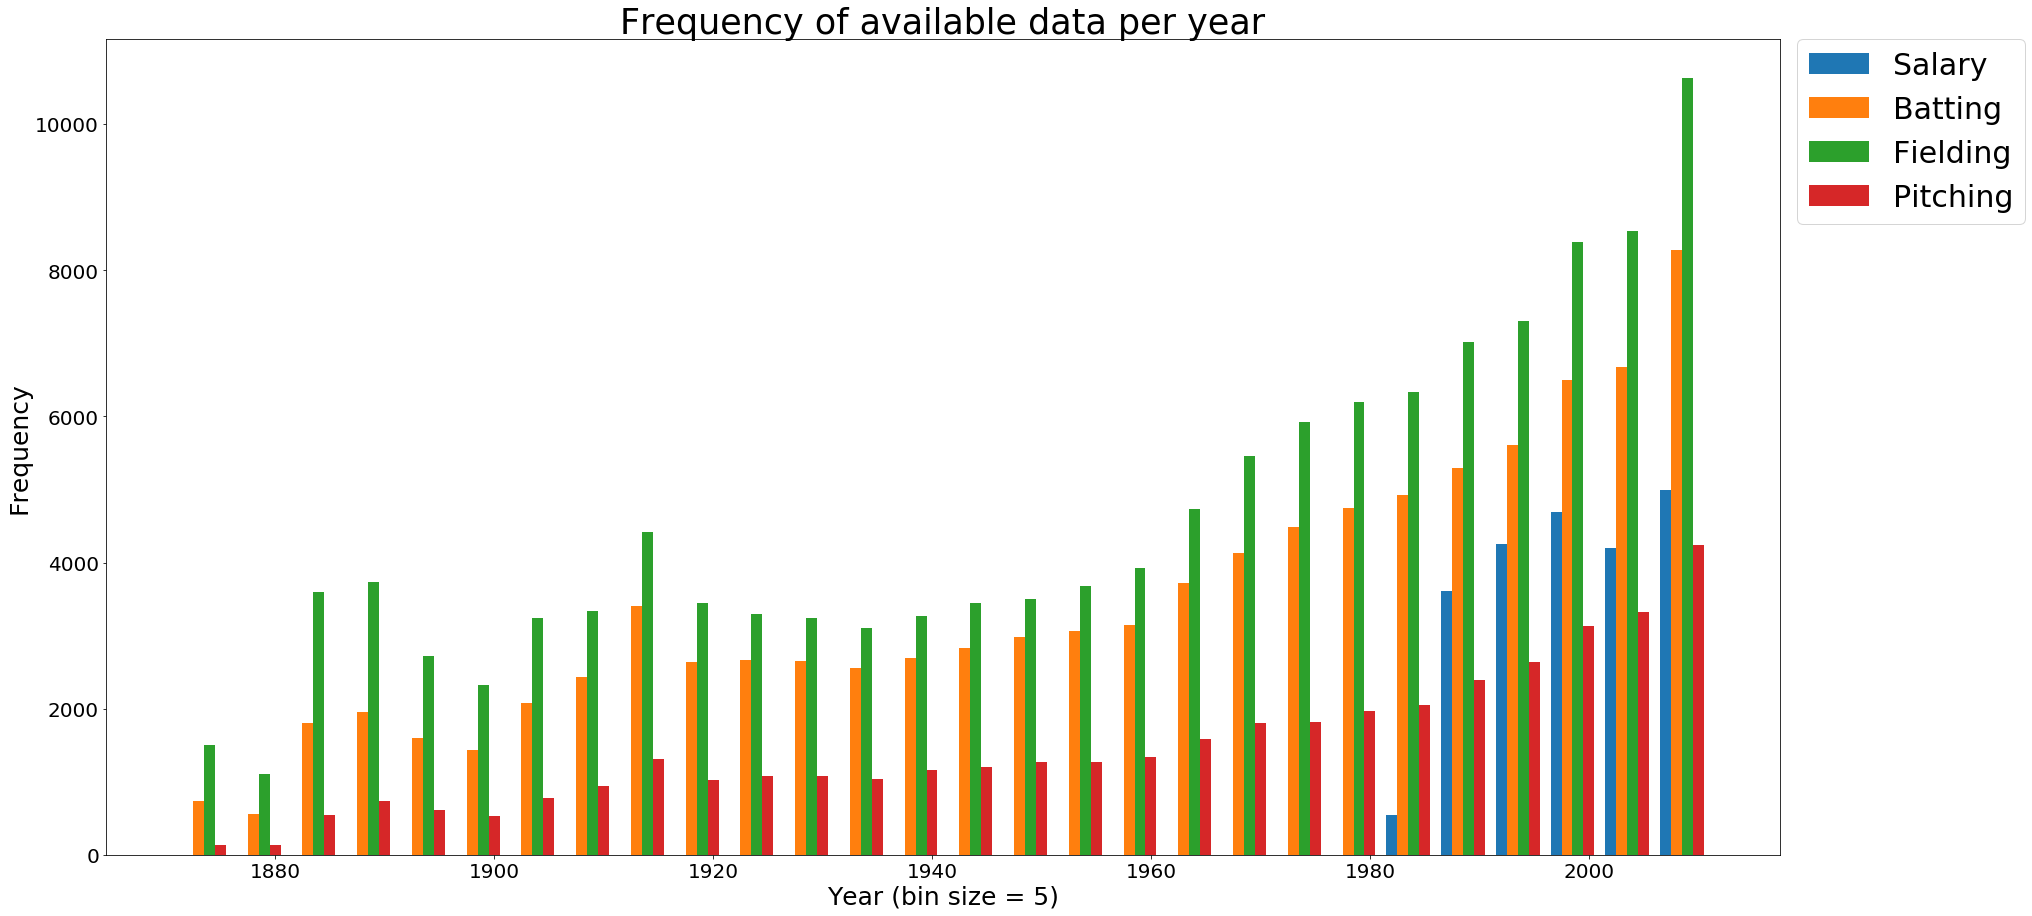

In [3]:
# Function to check the range in years of the available data
def get_year_range(database):
    min_year = database['yearID'].min()
    max_year = database['yearID'].max()
    return min_year, max_year
    
print('')
# Check year range for the salary dataset
min_salary_year, max_salary_year = get_year_range(Salaries_dataset)
print('Salary information are available from %d to %d' % (min_salary_year, max_salary_year) )

# Check year range for the batting dataset
min_batting_year, max_batting_year = get_year_range(Batting_dataset)
print('Batting information are available from %d to %d' % (min_batting_year, max_batting_year) )

# Check year range for the fielding dataset
min_fielding_year, max_fielding_year = get_year_range(Fielding_dataset)
print('Fielding information are available from %d to %d' % (min_fielding_year, max_fielding_year) )

# Check year range for the pitching dataset
min_pitching_year, max_pitching_year = get_year_range(Pitching_dataset)
print('Pitching information are available from %d to %d' % (min_pitching_year, max_pitching_year) )
print('')

# Histogram of annual salary availability

# bin_size_years = 1
# num_bins = int((max_salary_year - min_salary_year) / 2) + 1
# Salaries_dataset['yearID'].hist(bins=num_bins, figsize=(20,15))
# plt.xlabel('Year',fontsize=20)
# plt.ylabel('Frequency',fontsize=20)
# plt.title('Salary information per year',fontsize=25)
# plt.show()


# Histogram of yearly availability of data
a = [Salaries_dataset['yearID'], Batting_dataset['yearID'], Fielding_dataset['yearID'], Pitching_dataset['yearID']]
categories = ['Salary','Batting','Fielding','Pitching']

# Compare frequency of data per year
plt.figure(figsize=(30,15))
plt.hist(a,bins=np.arange(min_batting_year, max_batting_year, 5),label=categories)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.,fontsize=30)
plt.title('Frequency of available data per year',fontsize=35)
plt.xlabel('Year (bin size = 5)',fontsize=25)
plt.ylabel('Frequency',fontsize=25)
plt.tick_params(labelsize=20)
plt.show()

The histogram shows the frequency of the available data per year. Salary information along with stats for batting, fielding and pitching are compared. As we can observe from the histogram, **information on performance metrics are available from 1871 until 2016, whereas salary information are available only from 1985 until 2016**. This explains why the size of the salary dataset is smaller than the others. 

In order to study the correlation between performance parameters and salary properly, we need to consider the balling, fielding and pitching statistics from 1985. Notably, data have always different frequency, therefore there are more statistics than salary information. Probably, some players may miss salary information, whereas they have statistics. We will investigate it in the next step.

The histogram also shows that the available statistics have different distribution over years. Fielding dataset provides more information per year, since the frequency of data is always higher than the others. Fewer data are available for pitching. This aspect must be eventually taken into account in the following steps of the analysis.

### Select performance metrics since 1985
We saw that salary information are available from 1985 only, whereas batting, pitching and fielding statistics are available from 1871. Therefore, we extract the performance parameters from 1985 and we save them in new Pandas' datasets.

In [4]:
# Select performance parameters since 1985
Batting_stats_since1985 = Batting_dataset.loc[Batting_dataset['yearID'] >=1985]
Fielding_stats_since1985 = Fielding_dataset.loc[Fielding_dataset['yearID'] >=1985]
Pitching_stats_since1985 = Pitching_dataset.loc[Pitching_dataset['yearID'] >=1985]

print('')
print('Batting stats since 1985: %d' %len(Batting_stats_since1985))

print('')
print('Fielding stats since 1985: %d' %len(Fielding_stats_since1985))

print('')
print('Pitching stats since 1985: %d' %len(Pitching_stats_since1985))



Batting stats since 1985: 40577

Fielding stats since 1985: 52558

Pitching stats since 1985: 19983


### Drop players traded during the season
As depicted also in the Histogram, statistics since 1985 have different size than the salary information dataset. In fact, Pitching dataset has 19983 entries, Fielding has 52558 entries, Batting has 40577 entries and salary information dataset has 26428. Therefore, not all the players in the salary dataset have pitching statistics available, whereas not all the players of in the batting and fielding datasets have salary information available.

Before merging salary and statistics datasets, we analyze the salary information by grouping by player ID and year ID.  

In [5]:
# Group salary dataset by playerID and year
Salary_group = Salaries_dataset.groupby(['playerID','yearID'])
num_salary_groups = len(Salary_group)
print('')
print('Size of the original salary dataset: %d' %num_salary_info)
print('Number of groups by player and year: %d' %num_salary_groups)
size_Salary_group = Salary_group.size()
double_salary_groups = size_Salary_group[size_Salary_group ==2]
print('')
print('A total number of %d groups have size of 2' %(num_salary_info - num_salary_groups))
print(double_salary_groups.head())

print('')
print('For example the player barkele01 in 1987 has two info since he was traded by two teams')
Salary_group.get_group(('barkele01',1987))



Size of the original salary dataset: 26428
Number of groups by player and year: 26323

A total number of 105 groups have size of 2
playerID   yearID
anderla02  1986      2
barkele01  1987      2
bereja01   1998      2
berrada01  1987      2
berryda01  1995      2
dtype: int64

For example the player barkele01 in 1987 has two info since he was traded by two teams


,yearID,teamID,lgID,playerID,salary
1291,1987,ATL,NL,barkele01,890000
1613,1987,ML4,AL,barkele01,72500


Some groups player/year of the salary dataset are not unique. In fact, 105 players were traded during the regular season and there are salary information relative to the first team and to the second team in a single year. Since we are looking for correlations between salary and statistics, we could merge the statistics of the two parts of the season to get the statistics of the player for the entire season. However, we do not have enough expertise on baseball statistics to do this merging procedure correctly. Since the traded players represent only the 0.3% of the salary dataset, we decide to drop them from the analysis. 

In [6]:
# Drop traded players
def remove_multiple_groups(df,group_index):
    df_grouped = df.groupby(group_index)  # group data and generate dataframegroupby
    df_grouped_filtered = df_grouped.filter(lambda x: len(x) == 1)  # Return a copy of a DataFrame excluding elements from groups that do not satisfy the boolean criterion specified by func
    df_unique = df_grouped_filtered.reset_index()  # convert dataframegroupby to dataframe
    return df_unique
    
grouping_index = ['playerID','yearID']
Salary_data_unique = remove_multiple_groups(Salaries_dataset,grouping_index)
num_salary_unique = len(Salary_data_unique)
print('Size of salary dataset without players traded during seasons: %d' %num_salary_unique)


Size of salary dataset without players traded during seasons: 26218


We want to remove traded players from the statistics datasets too. We use the same function.

In [7]:
Batting_since1985_unique = remove_multiple_groups(Batting_stats_since1985,grouping_index)
Fielding_since1985_unique = remove_multiple_groups(Fielding_stats_since1985,grouping_index)
Pitching_since1985_unique = remove_multiple_groups(Pitching_stats_since1985,grouping_index)

num_batting1985_unique = len(Batting_since1985_unique)
num_fielding1985_unique = len(Fielding_since1985_unique)
num_pitching1985_unique = len(Pitching_since1985_unique)
print('Number of batting stats from 1985 without players traded during seasons: %d (original: %d)' %(num_batting1985_unique,len(Batting_stats_since1985)))
print('Number of fielding stats from 1985 without players traded during seasons: %d (original: %d)' %(num_fielding1985_unique,len(Fielding_stats_since1985)))
print('Number of pitching stats from 1985 without players traded during seasons: %d (original: %d)' %(num_pitching1985_unique,len(Pitching_stats_since1985)))

Number of batting stats from 1985 without players traded during seasons: 34363 (original: 40577)
Number of fielding stats from 1985 without players traded during seasons: 27679 (original: 52558)
Number of pitching stats from 1985 without players traded during seasons: 16800 (original: 19983)


### Merge salary and performance parameters

So far we have selected statistics since 1985 as salary information are available from that year only. Moreover, we have removed the players traded during regular seasons since the salary dataset would have two salary information for that year. This could lead to errors in the correlation analysis. 

We now merge the salary data and performance parameters in order to get the statistics of the paied players since 1985. We use Panda's merge function and we create new dataframes.

In [8]:
# Merge statistics with salary
Salary_and_Batting = pd.merge(Salary_data_unique,Batting_since1985_unique,on=['playerID','yearID'],how='left')
# Drop double columns and rename
Salary_and_Batting.drop(['teamID_y','lgID_y','index_y','index_x'], axis=1,inplace=True)
Salary_and_Batting.rename(columns={'teamID_x': 'teamID', 'lgID_x': 'lgID'}, inplace=True)


Salary_and_Fielding = pd.merge(Salary_data_unique,Fielding_since1985_unique,on=['playerID','yearID'],how='left')
# Drop double columns and rename
Salary_and_Fielding.drop(['teamID_y','lgID_y','index_y','index_x'], axis=1,inplace=True)
Salary_and_Fielding.rename(columns={'teamID_x': 'teamID', 'lgID_x': 'lgID'}, inplace=True)


Salary_and_Pitching = pd.merge(Salary_data_unique,Pitching_since1985_unique,on=['playerID','yearID'],how='left')

# Drop double columns and rename
Salary_and_Pitching.drop(['teamID_y','lgID_y','index_y','index_x'], axis=1,inplace=True)
Salary_and_Pitching.rename(columns={'teamID_x': 'teamID', 'lgID_x': 'lgID'}, inplace=True)

print('')
print('Size for batting: %d' %len(Salary_and_Batting))
print('Size for pitching: %d' %len(Salary_and_Fielding))
print('Size for fielding: %d' %len(Salary_and_Pitching))



Size for batting: 26218
Size for pitching: 26218
Size for fielding: 26218


### Remove missing values from dataset
We now focus on dealing with missing values from the three dataframes just created: salary and batting statistics, salary and fielding statistics, and salary and pitching statistics. For each dataset, we proceed as follows.

First, we check the integrity of the dataset by plotting the barplot of the numeric values. We define integrity of a single performance category as the percentage of numeric values over the total number of players. Therefore, integrity indicates how many missing data (NaN) are presented in each performance category. For example, 100% of integrity means that all the data of a certain category are numeric and, therefore, there are no NaN. 

Based on the integrity level, we drop all the categories having low integrity, i.e. lower that 33% for example. In fact, integrity lower than 33% means that most values are unvailable, maybe because there were some problems in collecting data. In this analysis, we prefer to deal with complete categories and, therefore, we simply drop categories with low integrity.

We then search for those players having salary information but performance metrics. In this case, we drop the players having all the statistics of a season as NaN.

At this point, dataframes are composed by categories with high integrity (more than 33%). We fill NaN with the mean values in each category. 


#### Create functions for the analysis
We create three functions that will be applied to the three datasets.
1. *analyze_data_integrity()* calculates the integrity of each performance metric's category, plots the barplot of integrities and returns the attributes with high integrity
2. *show_nan()* finds players having all the statistics as NaN in a season
3. *remove_players_with_NaN()* remove players having all the statistics as NaN in a season

In [9]:
# Function to visualize integrity of data, i.e. percentage of missing values per attribute
def analyze_data_integrity(dataset,name,pct_threshold,plot):
   # dataset.info()
    num_player_stat = len(dataset)
    
    # Estimate how many NaN for each stat category and select most complete categories
    num_data_values = []
    stat_attribute = []
    selected_attribute = []
    for column in dataset:
        pct = 100*len(dataset[column].dropna())/num_player_stat
        num_data_values.append(pct)
        stat_attribute.append(column)
        if pct>=pct_threshold:
            selected_attribute.append(column)

    # Create barplot to visualize data integrity
    if plot:
        N = len(num_data_values)
        x = range(N)
        y_pos = np.arange(len(stat_attribute))
        fig = plt.figure(figsize=(15,10))
        plt.barh(y_pos, num_data_values, align='center', alpha=0.5)
        plt.yticks(y_pos, stat_attribute)
        plt.xlabel('Integrity [%]',fontsize=20)
        plt.ylabel('Categories',fontsize=20)
        plt.title('Integrity of stat categories for '+ name,fontsize=25)
        plt.show()

    # 
    # Output the most complete stat categories
    return selected_attribute, np.max(num_data_values), np.min(num_data_values)

# Function to show players with NaN
def show_nan(df,num_stats):
    counter=0
    counter_Lines_NaN = 0
    for index,row in df.iterrows():
        findNaN = row.isnull()  # print(row.to_frame().T)
        if sum(findNaN)==num_stats:
            counter_Lines_NaN = counter_Lines_NaN + 1
        if (findNaN.any()==True) & (counter<2):
            counter = counter + 1
            print(row.to_frame().T)
    return counter_Lines_NaN



# Function to remove players with NaN stats
def remove_players_with_NaN(df):
    for index,row in df.iterrows():
        findNaN = row.isnull()  # print(row.to_frame().T)
        if findNaN.any()==True:
            df.drop(index, inplace=True)
    return df
        
    


#### Removing NaN from Batting
The first step is to check the integrity of each batting category. 

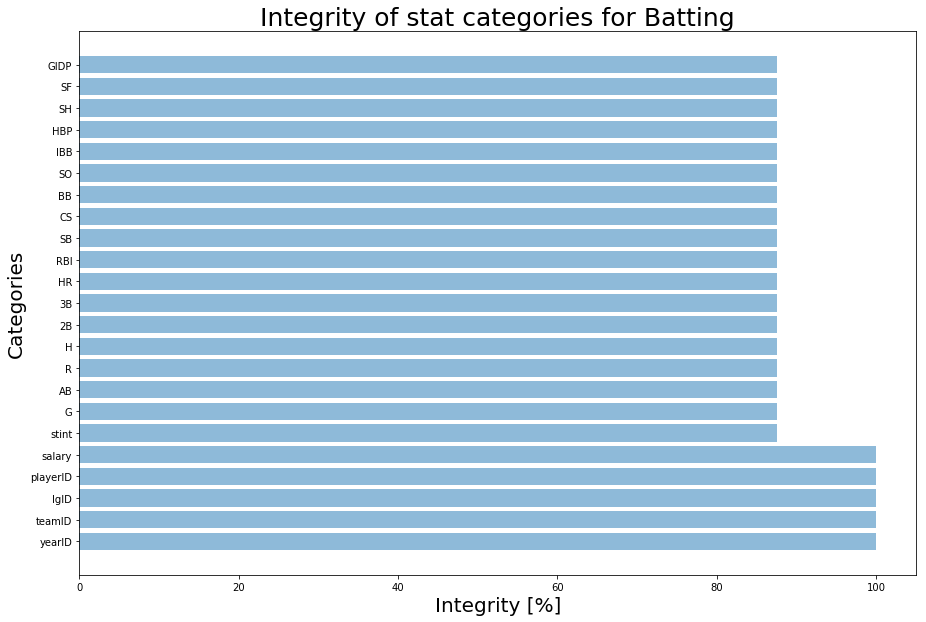


Minimum integrity: 87.56 pct


In [10]:
# Check missing data in batting
complete_attr_batting, max_integrity_batting, min_integrity_batting = analyze_data_integrity(Salary_and_Batting,'Batting',90,plot=True)
print('')
print('Minimum integrity: %.2f pct' %min_integrity_batting)

The previous barplot summarizes the integrity of each statistics category for Batting. Notably all the categories have high integrity since the minimum integrity is 87.56%. Therefore, we keep all the categories. Furthermore, all the performance metrics have the same integrity that is 87.56%. We need to look now for the players with missing statistics in a season.

In [11]:
miss_stat = show_nan(Salary_and_Batting,18)
print('The number of players with missing categories in a season in %d' %miss_stat)

   yearID teamID lgID   playerID  salary stint    G   AB    R    H ...   RBI  \
62   1985    BOS   AL  nichore01  260000   NaN  NaN  NaN  NaN  NaN ...   NaN   

     SB   CS   BB   SO  IBB  HBP   SH   SF GIDP  
62  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[1 rows x 23 columns]
   yearID teamID lgID  playerID  salary stint    G   AB    R    H ...   RBI  \
65   1985    BOS   AL  remyje01  483333   NaN  NaN  NaN  NaN  NaN ...   NaN   

     SB   CS   BB   SO  IBB  HBP   SH   SF GIDP  
65  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[1 rows x 23 columns]
The number of players with missing categories in a season in 3261


In total, 3261 players have missing statistics in a season. Notably, 3261/26218 = 0.1244, which corresponds to the missing level of integrity (see barplot). We now remove these players from the dataframe:

In [12]:
# Remove players with NaN stats
Salary_and_Batting_full = remove_players_with_NaN(Salary_and_Batting)

# Chekc presence of NaN
if Salary_and_Batting_full.isnull().any().any():
    print('There are still NaN in this dataset!!')
else:
    print('There are no NaN in this dataset')
    
# Display info
print('')
Salary_and_Batting_full.info()

There are no NaN in this dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22957 entries, 0 to 26217
Data columns (total 23 columns):
yearID      22957 non-null int64
teamID      22957 non-null object
lgID        22957 non-null object
playerID    22957 non-null object
salary      22957 non-null int64
stint       22957 non-null float64
G           22957 non-null float64
AB          22957 non-null float64
R           22957 non-null float64
H           22957 non-null float64
2B          22957 non-null float64
3B          22957 non-null float64
HR          22957 non-null float64
RBI         22957 non-null float64
SB          22957 non-null float64
CS          22957 non-null float64
BB          22957 non-null float64
SO          22957 non-null float64
IBB         22957 non-null float64
HBP         22957 non-null float64
SH          22957 non-null float64
SF          22957 non-null float64
GIDP        22957 non-null float64
dtypes: float64(18), int64(2), object(3)
memory usage: 4.2+

As we can see from the dataset info, the dataset of salary and batting stats is complete and consists of 22957 entries.

#### Removing NaN from Fielding
The first step is to check the integrity of each fielding category. 

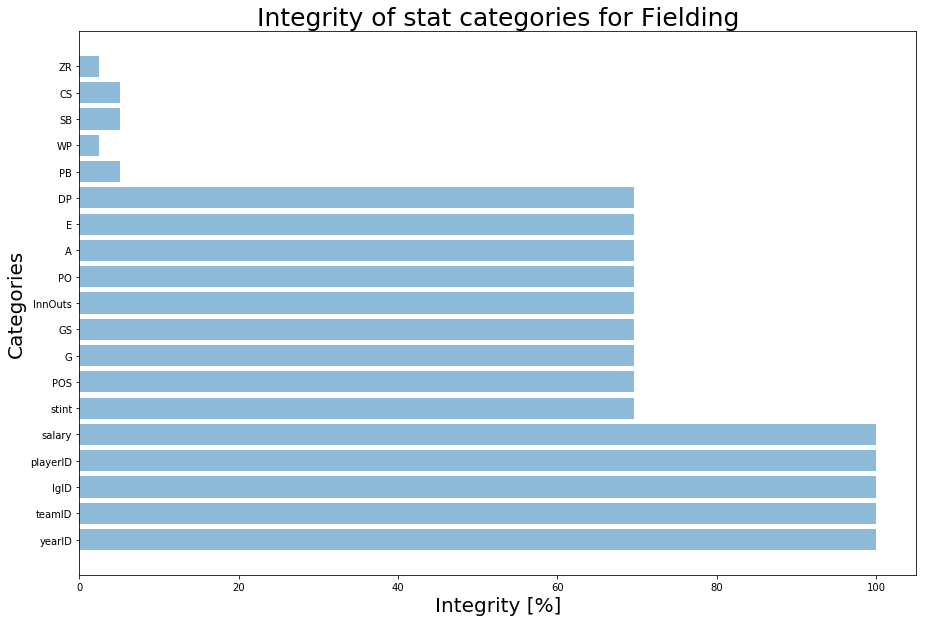


Minimum integrity: 2.46 pct


In [13]:
complete_attr_fielding, max_integrity_fielding, min_integrity_fielding = analyze_data_integrity(Salary_and_Fielding,'Fielding',50,plot=True)
print('')
print('Minimum integrity: %.2f pct' %min_integrity_fielding)

The barplot summarizes the integrity of each statistics category for Fielding. We can notice that the metrics ZR, CS, SB, WP and PB are mostly incomplete since most of the values are NaN and the integrity is lower than 10%. Furthermore, the categories DP, E, A, PO, InnOuts, GS, G, POS, stint have the same level of integrity being 70%. We need to find and remove players with missing fielding statistics in a season.

We now drop ZR, CS, SB, WP and PB from the dataset since they have low integrity. Then we remove the players with missing fielding statistics in a season.

In [14]:
# Remove statistics attributes with few data
Salary_and_Fielding = Salary_and_Fielding[complete_attr_fielding]


# Remove players with NaN stats
Salary_and_Fielding_full = remove_players_with_NaN(Salary_and_Fielding)

# Chekc presence of NaN
if Salary_and_Fielding_full.isnull().any().any():
    print('There are still NaN in this dataset!!')
else:
    print('There are no NaN in this dataset')
    
# Display info
print('')
Salary_and_Fielding_full.info()

There are no NaN in this dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18240 entries, 0 to 26217
Data columns (total 14 columns):
yearID      18240 non-null int64
teamID      18240 non-null object
lgID        18240 non-null object
playerID    18240 non-null object
salary      18240 non-null int64
stint       18240 non-null float64
POS         18240 non-null object
G           18240 non-null float64
GS          18240 non-null float64
InnOuts     18240 non-null float64
PO          18240 non-null float64
A           18240 non-null float64
E           18240 non-null float64
DP          18240 non-null float64
dtypes: float64(8), int64(2), object(4)
memory usage: 2.1+ MB


As we can see from the dataset info, the dataset of salary and fielding stats is complete and consists of 18240 entries.

#### Removing NaN from Pitching
The first step is to check the integrity of each pitching category. 

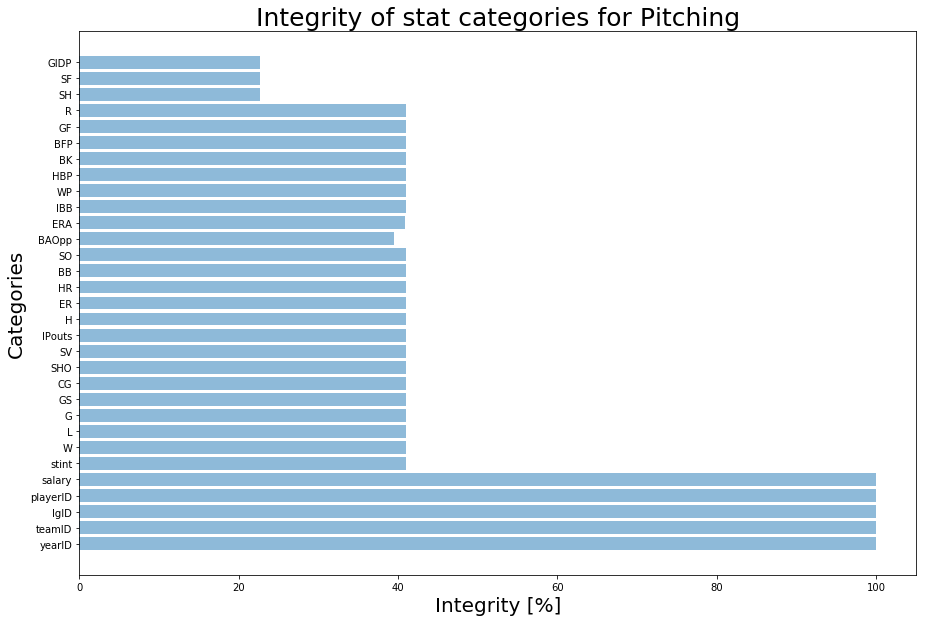


Minimum integrity: 22.71 pct


In [15]:
complete_attr_pitching, max_integrity_pitching, min_integrity_pitching = analyze_data_integrity(Salary_and_Pitching,'Pitching',30,plot=True)
print('')
print('Minimum integrity: %.2f pct' %min_integrity_pitching)

The barplot summarizes the integrity of each statistics category for Pitching. We can notice that the metrics GDP, SF and SH are incomplete since most of the values are NaN and their integrity is 22.7%. Furthermore, all the remaining performance parameters have the same level of integrity being around 40% except for BAOpp, whose integrity is about 38%. In this case, we proceed as follows:
1. Drop GDP, SF and SH from the dataset since they have low integrity.
2. Replace the values of BAOpp with the mean 
3. Remove the players with missing fielding statistics in a season.

In [16]:
# Remove statistics attributes with few data
Salary_and_Pitching = Salary_and_Pitching[complete_attr_pitching]

# replace NaN in BAOpp with mean
Salary_and_Pitching['BAOpp'].fillna(Salary_and_Pitching['BAOpp'].mean())

# Remove players with NaN stats
Salary_and_Pitching_full = remove_players_with_NaN(Salary_and_Pitching)

# Chekc presence of NaN
if Salary_and_Pitching_full.isnull().any().any():
    print('There are still NaN in this dataset!!')
else:
    print('There are no NaN in this dataset')

# Display info
print('')
Salary_and_Pitching_full.info()

There are no NaN in this dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10339 entries, 0 to 26215
Data columns (total 28 columns):
yearID      10339 non-null int64
teamID      10339 non-null object
lgID        10339 non-null object
playerID    10339 non-null object
salary      10339 non-null int64
stint       10339 non-null float64
W           10339 non-null float64
L           10339 non-null float64
G           10339 non-null float64
GS          10339 non-null float64
CG          10339 non-null float64
SHO         10339 non-null float64
SV          10339 non-null float64
IPouts      10339 non-null float64
H           10339 non-null float64
ER          10339 non-null float64
HR          10339 non-null float64
BB          10339 non-null float64
SO          10339 non-null float64
BAOpp       10339 non-null float64
ERA         10339 non-null float64
IBB         10339 non-null float64
WP          10339 non-null float64
HBP         10339 non-null float64
BK          10339 non-nu

As we can see from the dataset info, the dataset of salary and pitching stats is complete and consists of 10339 entries.

### Analyze correlation between salary and statistics

At this point, all the informaton on salaries and statistics are complete. We can proceed by analyzing the relationship between salary and statistics. 

To check for linear correlations, we calculate the Pearsons' r coefficient between salary and each statistics category.

To check for nonlinear correlations, we generate the scatter matrix of each dataset. In this way, we generate the scatter plots of each numeric categories versus any other category of the dataset.

In [17]:
# Select only numerical values
Salary_Batting_numeric = Salary_and_Batting_full.select_dtypes(['number']) 
Salary_Fielding_numeric = Salary_and_Fielding_full.select_dtypes(['number']) 
Salary_Pitching_numeric = Salary_and_Pitching_full.select_dtypes(['number']) 

#### Batting

salary    1.000000
yearID    0.347038
HR        0.290148
RBI       0.266498
BB        0.255654
R         0.241141
IBB       0.238405
GIDP      0.230995
2B        0.228648
H         0.226450
SO        0.225306
AB        0.219281
SF        0.197324
HBP       0.186161
G         0.175927
SB        0.060911
3B        0.043260
CS        0.030747
SH       -0.005706
stint          NaN
Name: salary, dtype: float64


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  # This is added back by InteractiveShellApp.init_path()


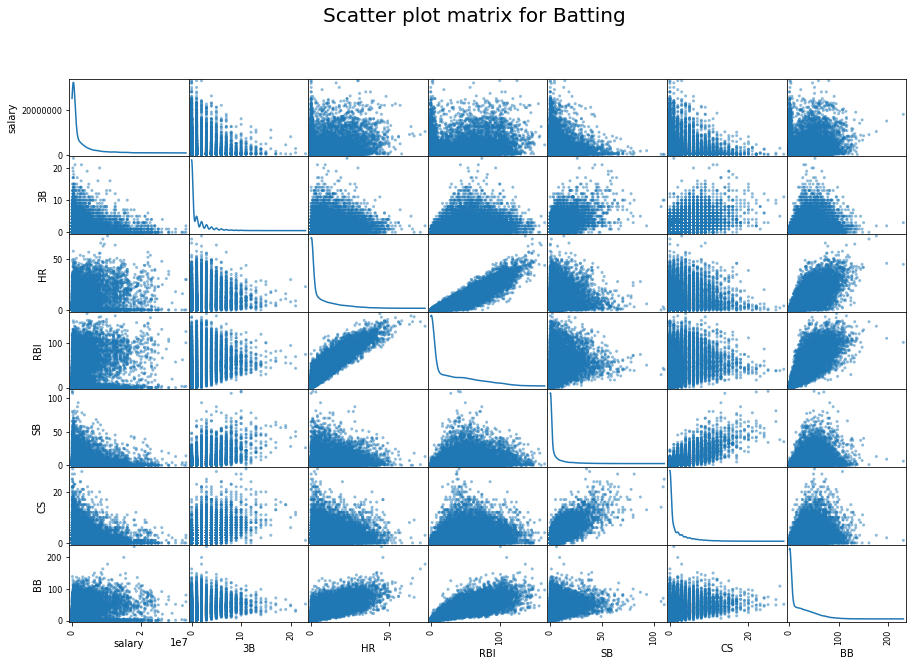

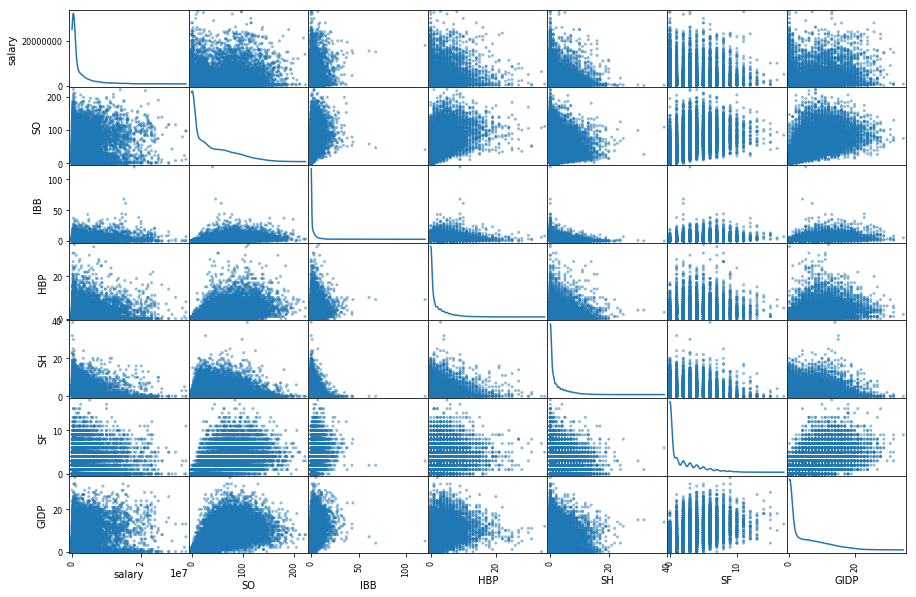

In [18]:
# Generate correlation matrix 
corr_matrix_batting = Salary_Batting_numeric.corr()
print(corr_matrix_batting['salary'].sort_values(ascending=False))

from pandas.tools.plotting import scatter_matrix
V1 = ['salary', 'stint', 'G', 'AB', 'R', 'H', '2B']
V2 = ['salary', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB']
V3 = ['salary', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP']
a = scatter_matrix(Salary_Batting_numeric[V2], figsize=(15, 10), diagonal='kde')
plt.suptitle('Scatter plot matrix for Batting',fontsize=20)
a = scatter_matrix(Salary_Batting_numeric[V3], figsize=(15, 10), diagonal='kde')


The previous plot represents the scatter matrix of the Batting dataset. Each metric of the batting performance along with the salary information are plotted versus each other in 2d scatter plots. The diagonal represents the histogram curves of each category. As demonstrated by the analysis with the Pearson's r coefficient, there are no linear relationships between salary and any other category of performance. Moreover, the salary's scatter plots do not show any nonlinear relationships with any other category of performance. No clustered data are observed.

Interestingly, we can observe a linear correlation between Homeruns (HR) and Runs Batted In (RBI), with a Pearson's r coefficient of 0.927. 

#### Fielding

salary     1.000000
yearID     0.350543
GS         0.246213
InnOuts    0.225452
G          0.182187
PO         0.156366
DP         0.149616
E          0.105361
A          0.105300
stint     -0.008026
Name: salary, dtype: float64


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


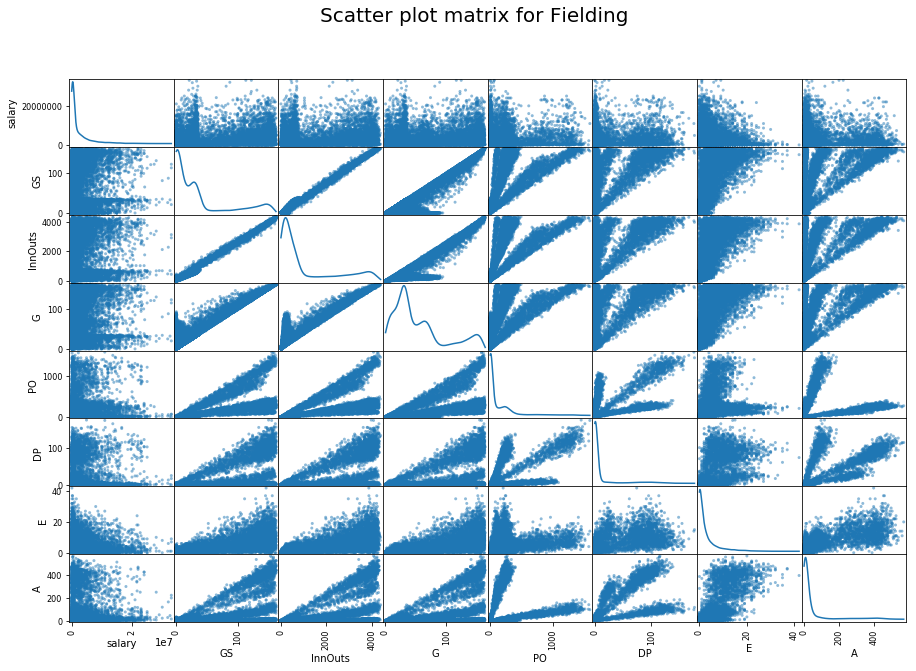

In [19]:
# Generate correlation matrix 
corr_matrix_fielding = Salary_Fielding_numeric.corr()
print(corr_matrix_fielding['salary'].sort_values(ascending=False))

V1 = ['salary', 'GS', 'InnOuts', 'G', 'PO', 'DP', 'E','A']
a = scatter_matrix(Salary_Fielding_numeric[V1], figsize=(15, 10), diagonal='kde')
plt.suptitle('Scatter plot matrix for Fielding',fontsize=20)

The previous plot represents the scatter matrix of the fielding dataset. Each metric of the fielding performance along with the salary information are plotted versus each other in 2d scatter plots. The diagonal represents the histogram curves of each category. As demonstrated by the analysis with the Pearson's r coefficient, there are no linear relationships between salary and any other category of performance. Moreover, the salary's scatter plots do not show any nonlinear relationships with any other category of performance. No clustered data are observed.

However, from the scatter matrix we can recognize some linear relationships between performance metrics. In particular, there is a strong linear correlation between Games Started and InnOuts (Time played in the field expressed as outs) with Pearson's r of 0.99. This result seems obvious, the more games a player starts, the more the time played he accumulates. The most interesting result is that some performance metrics show grouped linear correlations. 

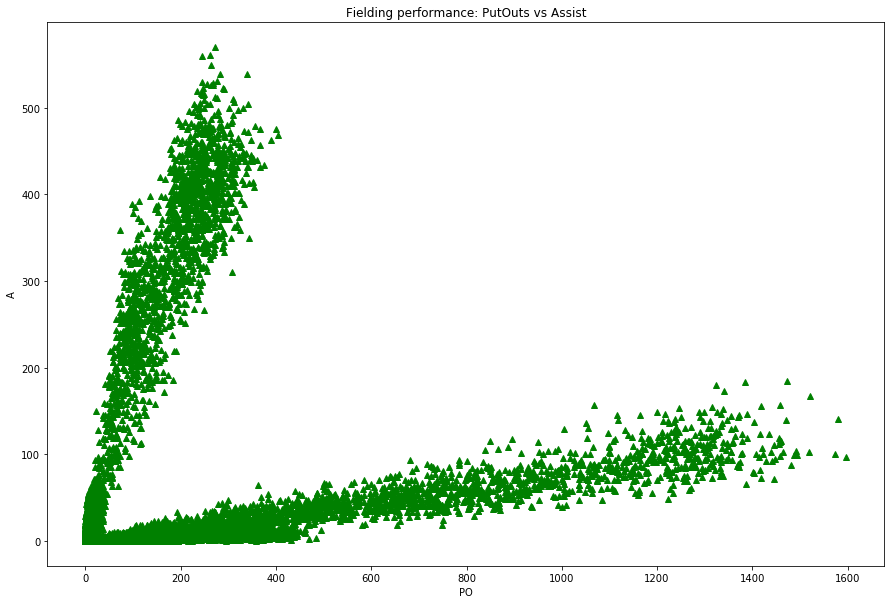

In [30]:
plt.figure(figsize=(15,10))
plt.plot(Salary_Fielding_numeric['PO'],Salary_Fielding_numeric['A'],'g^')
plt.title('Fielding performance: PutOuts vs Assist')
plt.xlabel('PO')
plt.ylabel('A')

The previous plot shows PutOuts (PO) vs Assist (A): we can observe two clear groups having linear correlation. Notably the Pearson's r is 0.24 (not 1), since there are two distinct groups.

#### Pitching

salary    1.000000
SO        0.332136
yearID    0.331180
GS        0.286185
W         0.275448
IPouts    0.269416
BFP       0.261479
H         0.253902
HR        0.251944
ER        0.229924
R         0.223120
HBP       0.218170
L         0.213159
BB        0.147491
SHO       0.104684
WP        0.103186
CG        0.081732
SV        0.079914
BAOpp    -0.002927
stint    -0.007813
G        -0.019997
GF       -0.031232
BK       -0.047463
IBB      -0.050410
ERA      -0.071410
Name: salary, dtype: float64


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  import sys
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if __name__ == '__main__':


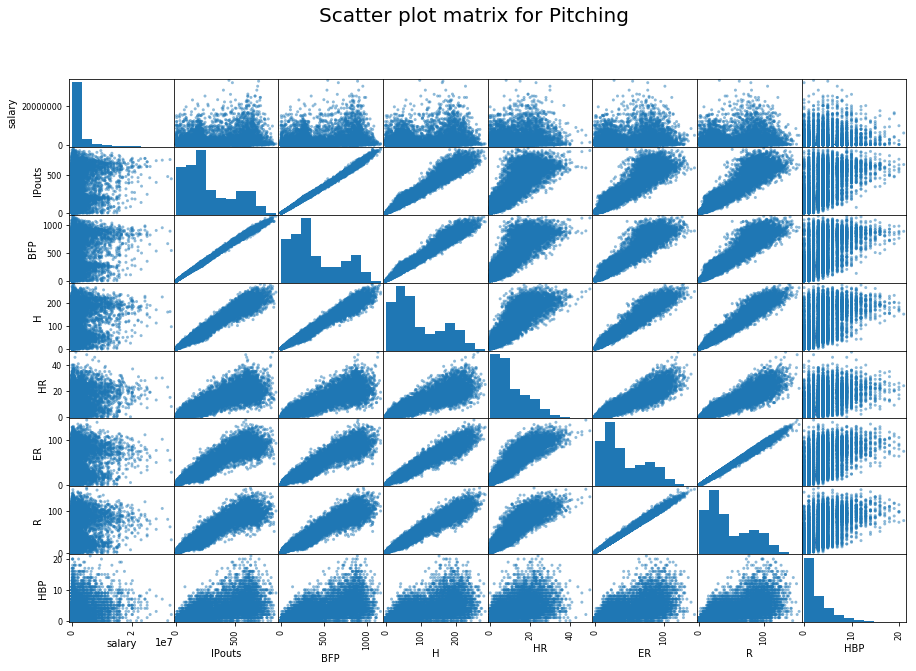

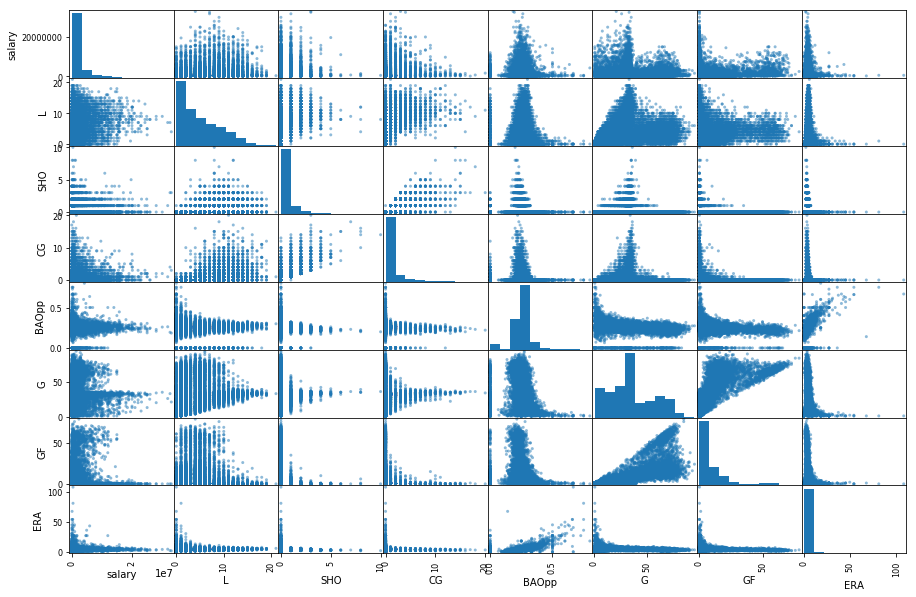

In [22]:
# Generate correlation matrix 
corr_matrix_pitching = Salary_Pitching_numeric.corr()
print(corr_matrix_pitching['salary'].sort_values(ascending=False))

V1 = ['salary', 'IPouts', 'BFP', 'H','HR','ER', 'R', 'HBP',]
V2 = ['salary', 'L', 'SHO', 'CG', 'BAOpp', 'G', 'GF','ERA']
a = scatter_matrix(Salary_Pitching_numeric[V1], figsize=(15, 10))
plt.suptitle('Scatter plot matrix for Pitching',fontsize=20)
a = scatter_matrix(Salary_Pitching_numeric[V2], figsize=(15, 10))



The previous plot represents the scatter matrix of the pitching dataset. Each metric of the pitching performance along with the salary information are plotted versus each other in 2d scatter plots. The diagonal represents the histogram curves of each category. As demonstrated by the analysis with the Pearson's r coefficient, there are no linear relationships between salary and any other category of performance. Moreover, the salary's scatter plots do not show any nonlinear relationships with any other category of performance. 

However, we can observe two interesting shapes in the plots Salary vs Opponent's Batting Average (BAOpp) and Salary vs Earned Run Average (ERA). Let us plot these two graphs.

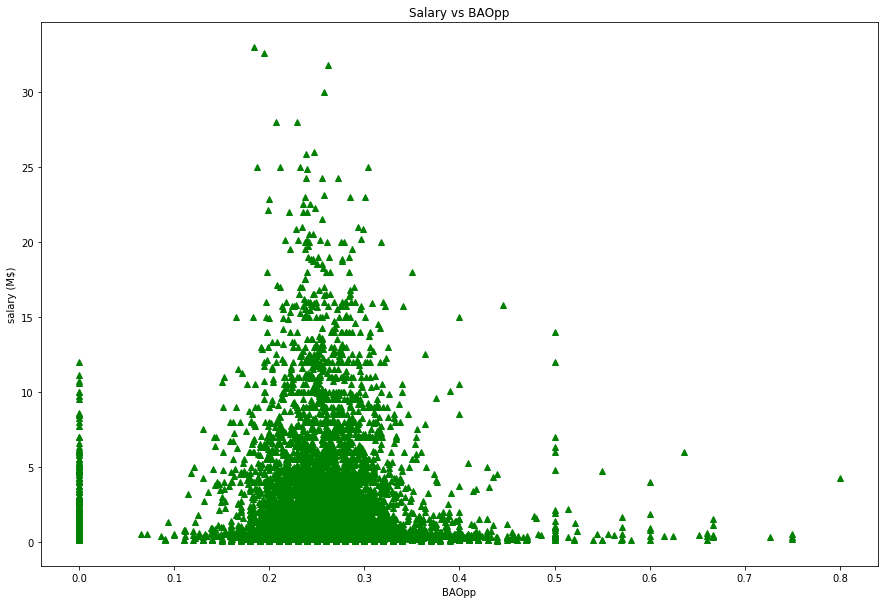

In [29]:
# Salary vs Opponent's Batting Average (BAOpp)
plt.figure(figsize=(15,10))
plt.plot(Salary_Pitching_numeric['BAOpp'],Salary_Pitching_numeric['salary']/1000000,'g^')
plt.xlabel('BAOpp')
plt.ylabel('salary (M$)')
plt.title('Salary vs BAOpp')
plt.figsize=(20, 30)
plt.show()


As we can observe from the Salary vs BAOpp scatter plot, data are concentrated in the range of BAOpp [0.1; 0.4]. Furthermore, the highest salaries are concentrated in the range of BAOpp [0.2; 0.3]. Players with highest salaries have BAOpp in the range [0.2; 0.3], which is therefore a peculiarity of highest paied players.

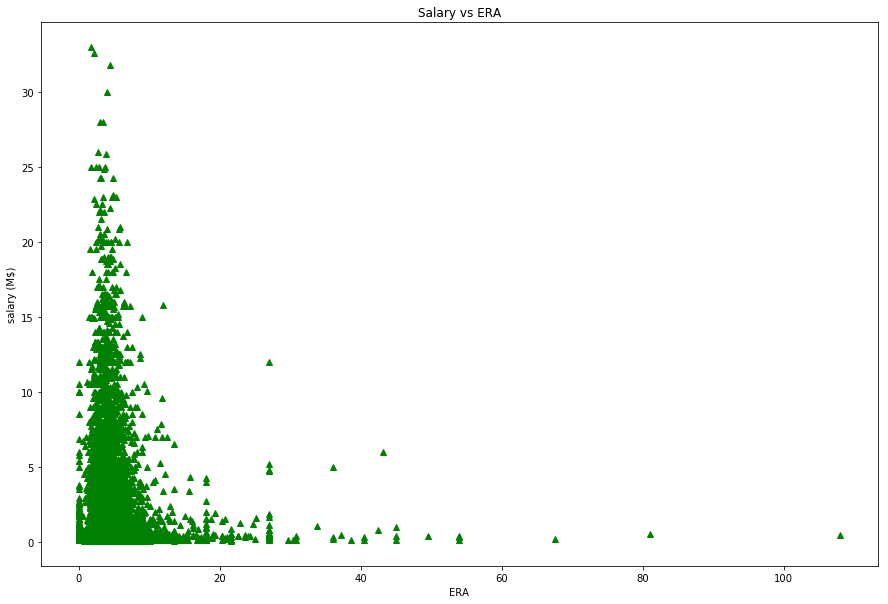

In [31]:
# Salary vs Earned Run Average (ERA)
plt.figure(figsize=(15,10))
plt.plot(Salary_Pitching_numeric['ERA'],Salary_Pitching_numeric['salary']/1000000,'g^')
plt.xlabel('ERA')
plt.ylabel('salary (M$)')
plt.title('Salary vs ERA')
plt.show()

As regard to the salary vs ERA plot, data are clusetered in the range of ERA [0; 20], whereas the highest salaries are concentrated in the interval [5; 10] ERA. Players with highest salaries have ERA in the range [5; 10], which is therefore a peculiarity of highest paied players.


## Conclusions
### Data analysis: summary and results
We have analyzed the relationship between salaries and performance parameters. The first step was to merge salary information with the corresponding statistics. Notably we considered data since 1985 as salary information are available from that year. We also dropped players that were traded during the regular season.

One of the main issues was to deal with missing values. We first defined integrity of a certain performance category as the percentage of numeric values in the dataset, i.e. 1 - percentage of NaN. We then removed those categories having low integrity (lower than 33%) as most of data were missing for those categories. Notably, we dropped ZR, CS, SB, WP and PB from fielding. The analysis of integrity showed that performance metrics in each dataset had the same value of integrity and below 100%. The reason is that some players had salary information but they missed statistics information, which were NaN. Therefore, we decided to drop such players. Since BAOpp (Pitching) had integrity slightly lower than the other categories, we replaced the missing values with the mean of BAOpp.

After merging and removing incomplete data, we looked for linear correlations between salary and performance parameters. The analysis with ther Pearson's r coefficient showed that there aren't any linear correlations between salary and statistics, whereas the analysis with scatterplots did not highlight any nonlinear correlation. Therefore, no correlations were found between salary and performance metrics. 

However, we could recognize two interesting clusters of data. The first one is observed in the salary vs BAOpp plot, where data are concentrated in the range [0.1; 0.4] BAOpp with a bell-shape. The second cluster is observed in the salary vs ERA plot, where data are concentrated in the range [0; 20] ERA. Both clusters have bell shape. Therefore we can spot the characteristics of the highest paied players. In particular, highest salaries are concentrated in the range [0.2; 0.3] BAOpp and [5; 10] ERA.

### Limitations and further improvements

#### Data wrangling
The first step in the data wrangling was to find those players that were traded during the regular season. Indeed these players had two different statistics and salary information during the year related to the previous and the new teams. In the analysis, we dropped these players since we had not enough expertiese to merge performance metrics correctly. Therefore, one improvement could be to merge the statistics of traded players instead of dropping them.

As regard to dealing with missing values, the approach in this analysis was to remove the performance metrics having a high percentage of missing values. We set this threshold as 33%. Furthermore, we noticed that some players had salary information but available performance metrics. Also in this case, we decided to remove the players with missing statistics. Finally, eventual remaining NaN were substituted with the category's mean. In this way, we obtained three complete datasets (batting, fielding, pitching) without NaN. 

This approach was enough for a first analysis. However, we observed in the dataset some performance metrics having 0.0 values. Further investigation is required to decide if these values should be considered missing values or not. 

#### Implementation efficiency
The implementation uses some NumPy and Pandas' built-in libraries such as scatter matrix, merge, drop, etc. One bottleneck was observed in the function for removing players with missing statistics **remove_players_with_NaN()**. In fact, we check the number of NaN in every line (player) of the dataset using a for loop. In case of large datasets, this operation requires minutes of computation. 

#### Data analysis
The analysis did not show any correlation (linear or nonlinear) between salary and performance metrics. The scatter plots highlighted two clustered distributions for BAOpp and ERA. We concluded that players with the highest salaries have BAOpp and ERA in a certain range, resulting the characteristics of highest paied players. 

In order to improve the analysis, we can try to further understand statistics with 0.0 values. Maybe these values can be treated as missing values and therefore must be removed or substituted. Otherwise, we need to understand if these values correspond to players that did not play in the season due to injury or because not employed by the coach. We could eventually drop these players. We could also try to obtain new performance parameters by merging the original ones, but expertiese in baseball is required. Therefore, the presence of statistics with 0.0 values could have undermine the analysis.

Statistical inference techniques can be used to further understand the distribution of Salary vs BAOpp or Salary vs ERA